In [1]:
import sys
sys.path.append('..')

from src.explainability.shap_explainer import SHAPExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

# Define feature names
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Load best model (LightGBM)
advanced_models = joblib.load('../results/models/advanced_models.pkl')
best_model = advanced_models['LightGBM']

print("✓ Data and model loaded")
print(f"Model: LightGBM")
print(f"Test samples: {X_test.shape[0]}")

✓ Data and model loaded
Model: LightGBM
Test samples: 61


In [2]:
# Initialize SHAP explainer
shap_explainer = SHAPExplainer(
    model=best_model,
    X_train=X_train,
    feature_names=feature_names
)

# Create explainer
shap_explainer.create_explainer()

# Calculate SHAP values
shap_values = shap_explainer.calculate_shap_values(X_test)

Creating SHAP explainer...
✓ SHAP explainer created

Calculating SHAP values...
✓ SHAP values calculated: (61, 13)



Generating SHAP summary plot...
✓ Summary plot generated


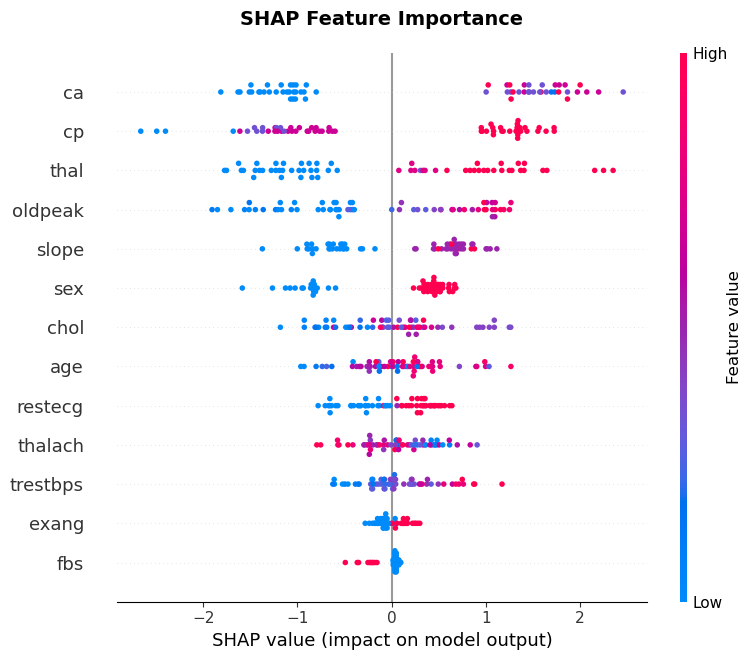

In [3]:
# Plot SHAP summary (beeswarm plot)
shap_explainer.plot_summary(X_test, max_display=13)
plt.show()


Generating SHAP bar plot...
✓ Bar plot generated


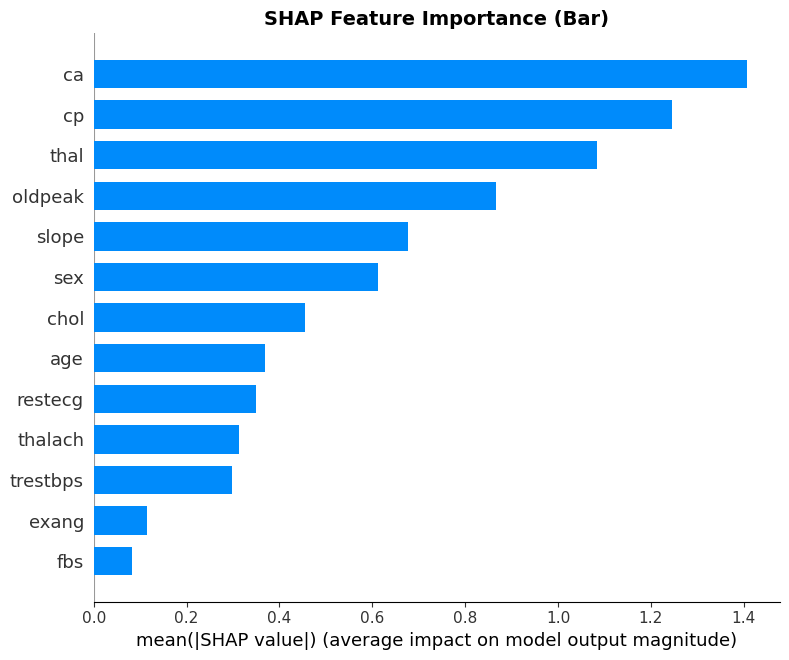

In [4]:
# Plot SHAP bar chart (feature importance)
shap_explainer.plot_bar(X_test, max_display=13)
plt.show()


Generating waterfall plot for sample 0...
✓ Waterfall plot generated

Generating waterfall plot for sample 1...
✓ Waterfall plot generated

Generating waterfall plot for sample 2...
✓ Waterfall plot generated

Generating waterfall plot for sample 3...
✓ Waterfall plot generated


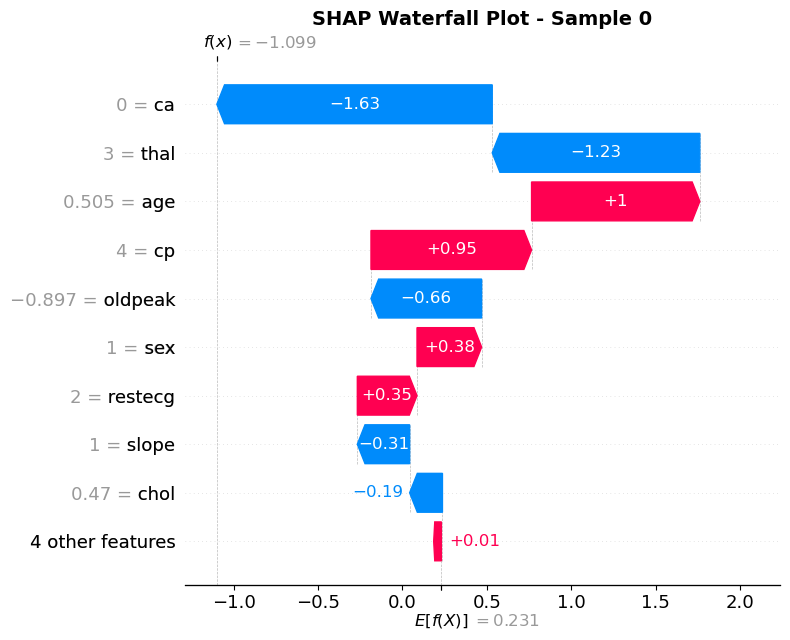

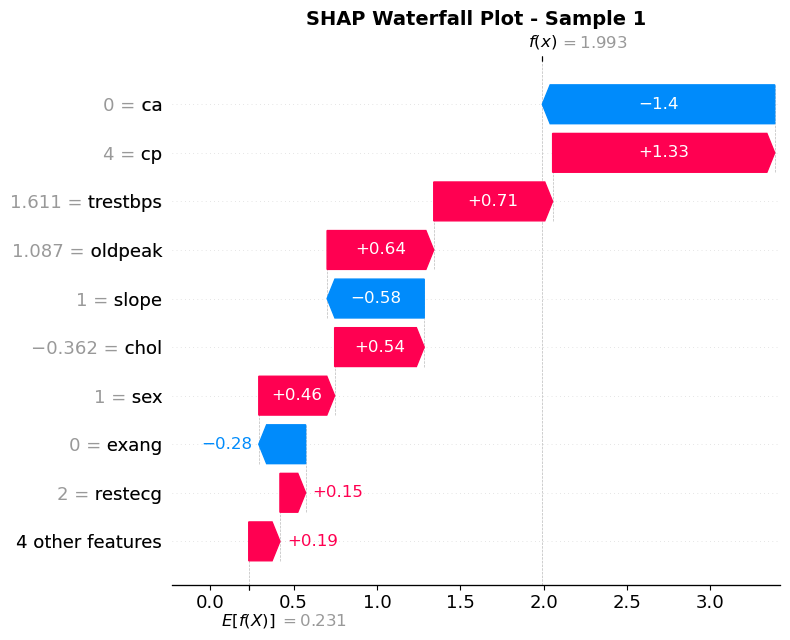

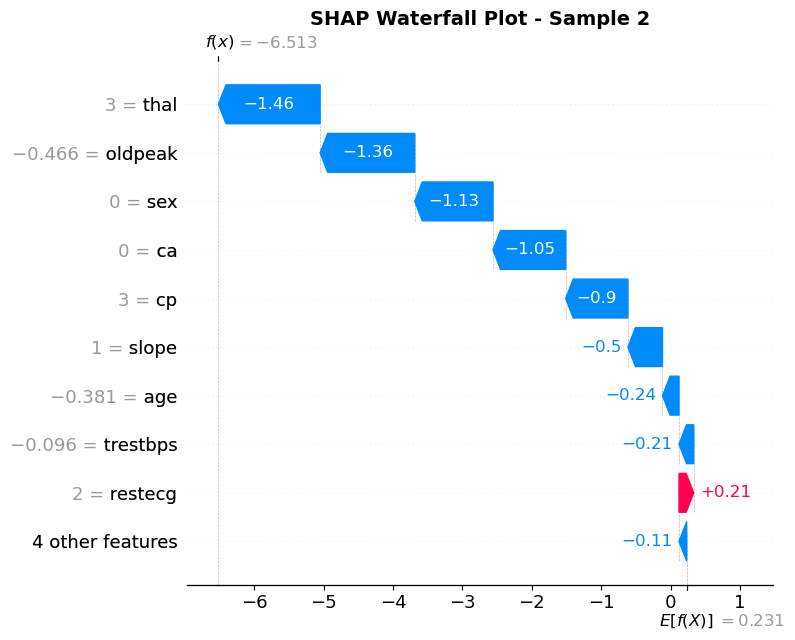

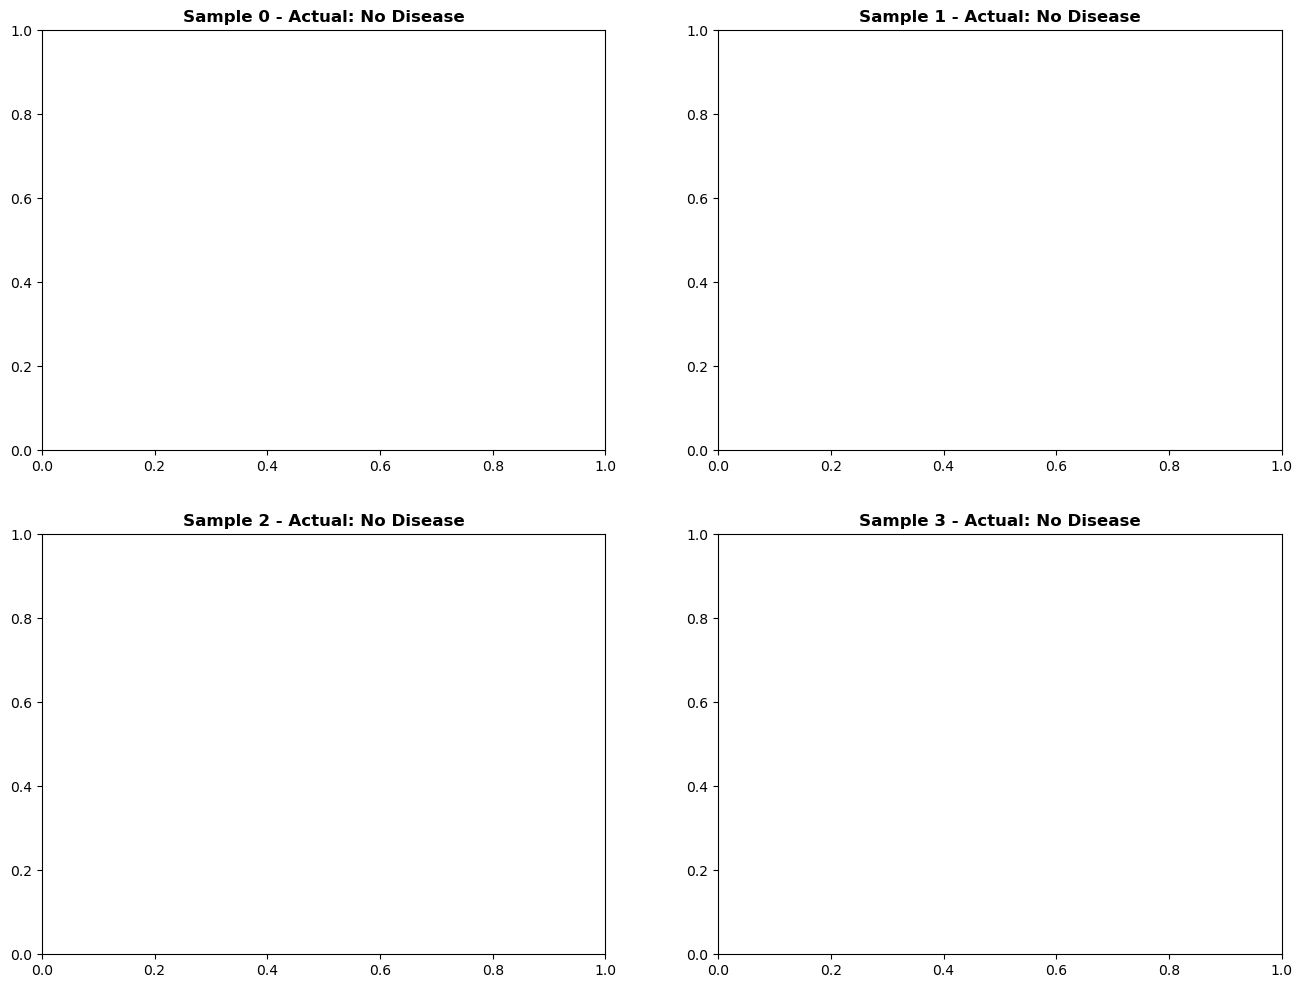

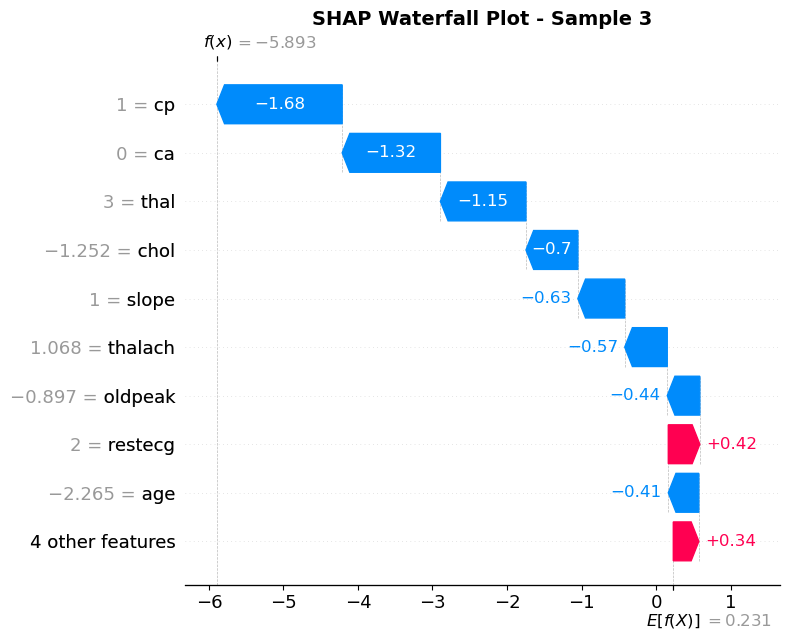

In [5]:
# Plot waterfall for individual predictions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 4 different samples
for idx, ax in enumerate(axes.flat):
    plt.sca(ax)
    shap_explainer.plot_waterfall(X_test, sample_idx=idx)
    actual = "Disease" if y_test[idx] == 1 else "No Disease"
    ax.set_title(f'Sample {idx} - Actual: {actual}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

SHAP GLOBAL FEATURE IMPORTANCE
     feature  importance
11        ca    1.407492
2         cp    1.244865
12      thal    1.084357
9    oldpeak    0.865265
10     slope    0.676334
1        sex    0.611539
4       chol    0.455846
0        age    0.369414
6    restecg    0.349531
7    thalach    0.312332
3   trestbps    0.297629
8      exang    0.113726
5        fbs    0.082685


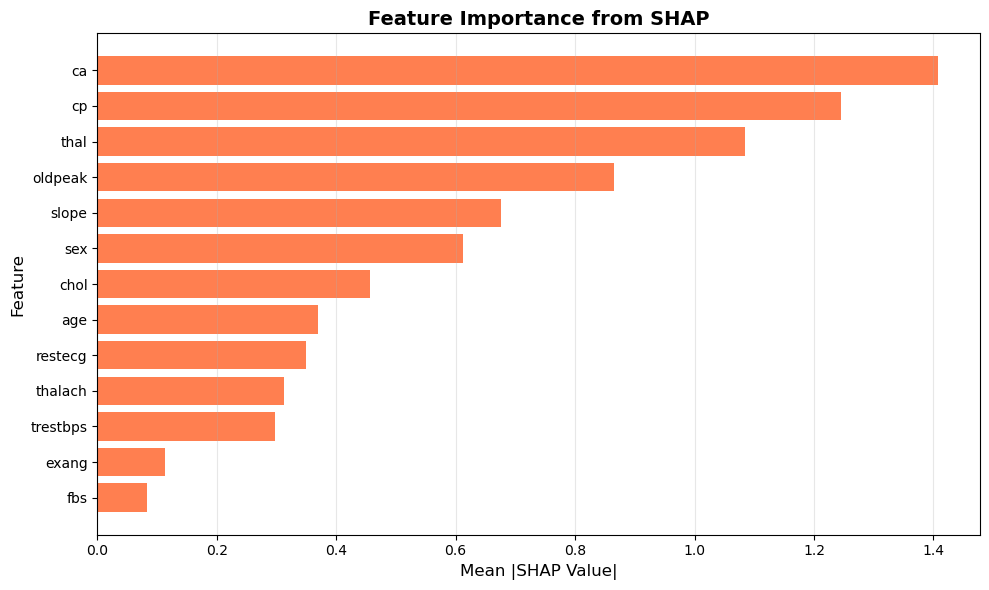


✓ SHAP analysis complete!


In [6]:
# Get global feature importance from SHAP
importance_df = shap_explainer.get_feature_importance()

print("="*60)
print("SHAP GLOBAL FEATURE IMPORTANCE")
print("="*60)
print(importance_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][::-1], importance_df['importance'][::-1], color='coral')
plt.xlabel('Mean |SHAP Value|', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance from SHAP', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ SHAP analysis complete!")